In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#!pip install keras

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [41]:
data_dir = "/content/drive/MyDrive/Research/Dataset/Apple Leaf Enhanced"

In [42]:
img_height,img_width=180,180
batch_size= 64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7771 files belonging to 4 classes.
Using 6217 files for training.


In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7771 files belonging to 4 classes.
Using 1554 files for validation.


In [44]:
class_names = train_ds.class_names
print(class_names)

['Apple_Black_rot', 'Apple_scab', 'Cedar_apple_rust', 'Healthy']


In [45]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [46]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 7)                3591      
 pper)                                                           
                                                                 
Total params: 24,640,391
Trainable params: 1,052,679
Non-trainable params: 23,587,712
__________________________________

In [47]:
import keras.backend as K

def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision1 = precision(y_true, y_pred)
    recall1 = recall(y_true, y_pred)
    return 2*((precision1*recall1)/(precision1+recall1+K.epsilon()))

In [48]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',
                     metrics=['accuracy', precision, recall,f1_score ])

In [49]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
98/98 [==============================] - 919s 9s/step - loss: 0.3240 - accuracy: 0.9040 - precision: 1.0000 - recall: 0.9780 - f1_score: 0.9872 - val_loss: 0.0686 - val_accuracy: 0.9775 - val_precision: 1.0000 - val_recall: 0.9969 - val_f1_score: 0.9984
Epoch 2/10
98/98 [==============================] - 845s 9s/step - loss: 0.0451 - accuracy: 0.9852 - precision: 1.0000 - recall: 0.9984 - f1_score: 0.9992 - val_loss: 0.0485 - val_accuracy: 0.9826 - val_precision: 1.0000 - val_recall: 0.9987 - val_f1_score: 0.9994
Epoch 3/10
98/98 [==============================] - 849s 9s/step - loss: 0.0229 - accuracy: 0.9945 - precision: 1.0000 - recall: 0.9990 - f1_score: 0.9995 - val_loss: 0.0427 - val_accuracy: 0.9826 - val_precision: 1.0000 - val_recall: 0.9987 - val_f1_score: 0.9994
Epoch 4/10
98/98 [==============================] - 848s 9s/step - loss: 0.0129 - accuracy: 0.9973 - precision: 1.0000 - recall: 0.9997 - f1_score: 0.9998 - val_loss: 0.0405 - val_accuracy: 0.9865 - val_pr

In [50]:
acc = list(history.history['accuracy'])
accV = list(history.history['val_accuracy'])
loss = list(history.history['loss'])
lossV = list(history.history['val_loss'])
rec = list(history.history['recall'])
recV = list(history.history['val_recall'])
F1 = list(history.history['f1_score'])
F1V = list(history.history['val_f1_score'])
preci = list(history.history['precision'])
preciV = list(history.history['val_precision'])

In [80]:
def Average(lst):
    return sum(lst) / len(lst)

In [51]:
print(acc)
print(accV)

[0.9039729833602905, 0.985201895236969, 0.9945310950279236, 0.9972655773162842, 0.9985523819923401, 0.9993566274642944, 0.9998391270637512, 1.0, 1.0, 1.0]
[0.977477490901947, 0.9826254844665527, 0.9826254844665527, 0.9864864945411682, 0.9858430027961731, 0.9877734780311584, 0.9897040128707886, 0.9916344881057739, 0.9909909963607788, 0.992277979850769]


In [81]:
average_acc = Average(acc)
average_accV = Average(accV)
print(average_acc)
print(average_accV)

0.9878719687461853
0.9867438912391663


In [52]:
print(preci)
print(preciV)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [53]:
print(F1)
print(F1V)

[0.9871811866760254, 0.9991952776908875, 0.9995179176330566, 0.9998393058776855, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9984251260757446, 0.9993700981140137, 0.9993700981140137, 0.9996850490570068, 0.9996850490570068, 0.9996850490570068, 0.9987401366233826, 0.999055027961731, 0.9996850490570068, 0.9996850490570068]


In [82]:
average_F1 = Average(F1)
average_F1V = Average(F1V)
print(average_F1)
print(average_F1V)

0.9985733687877655
0.999338573217392


In [54]:
print(rec)
print(recV)

[0.9779974222183228, 0.9984056353569031, 0.999043345451355, 0.9996811151504517, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.996874988079071, 0.9987499713897705, 0.9987499713897705, 0.9993749856948853, 0.9993749856948853, 0.9993749856948853, 0.9975000023841858, 0.9981250166893005, 0.9993749856948853, 0.9993749856948853]


In [83]:
average_rec = Average(rec)
average_recV = Average(recV)
print(average_rec)
print(average_recV)

0.9975127518177033
0.9986874878406524


In [55]:
print(loss)
print(lossV)

[0.3239990472793579, 0.045089107006788254, 0.022884776815772057, 0.01292820367962122, 0.008552266284823418, 0.005929776467382908, 0.004920740146189928, 0.0019500820199027658, 0.0017185038886964321, 0.0010682428255677223]
[0.06856197863817215, 0.048502903431653976, 0.042714498937129974, 0.040547795593738556, 0.038175251334905624, 0.03305540233850479, 0.031813450157642365, 0.027622424066066742, 0.027412183582782745, 0.026383286342024803]


In [84]:
average_loss = Average(loss)
average_lossV = Average(lossV)
print(average_loss)
print(average_lossV)

0.04290407464141026
0.03847891744226217


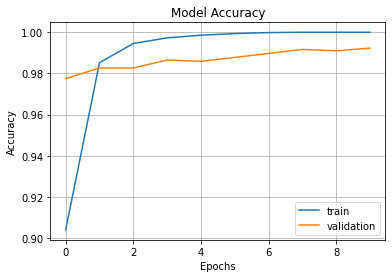

In [56]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.axis(ymin=0.4,ymax=1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

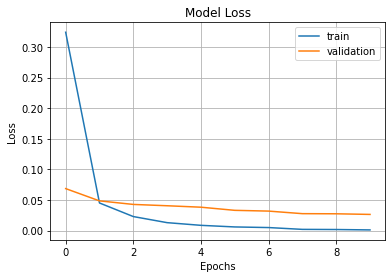

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

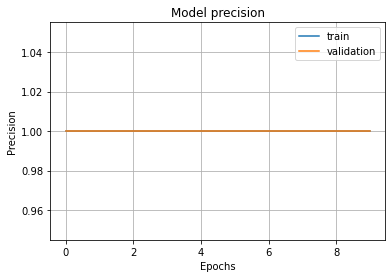

In [58]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.grid()
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

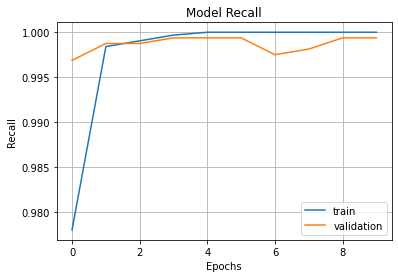

In [59]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.grid()
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

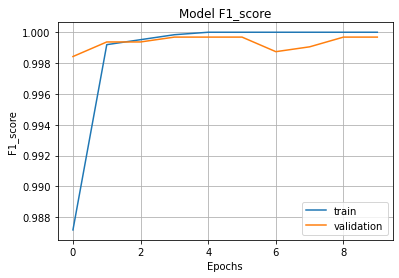

In [60]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.grid()
plt.title('Model F1_score')
plt.ylabel('F1_score')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [61]:
#val_ds2 = val_ds.unbatch()
#images = list(val_ds2.map(lambda x, y: x))
#labels = list(val_ds2.map(lambda x, y: y))

In [62]:
val_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1554)

Found 7771 files belonging to 4 classes.
Using 1554 files for validation.


In [63]:
for images, labels in val_ds2.take(1):
  numpy_images = images.numpy()
  numpy_labels = labels.numpy()

In [64]:
print(len(numpy_images))

1554


In [65]:
from sklearn.metrics import classification_report

y_pred_2D = resnet_model.predict(numpy_images)
y_true = numpy_labels

In [66]:
y_pred = []

for preds in y_pred_2D:
  preds = preds.tolist()
  max_pred = max(preds)
  index = preds.index(max_pred)
  y_pred.append(index)

In [67]:
target_names = train_ds.class_names
print(classification_report(y_true, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

 Apple_Black_rot       1.00      1.00      1.00       402
      Apple_scab       0.99      0.99      0.99       417
Cedar_apple_rust       0.99      1.00      0.99       341
         Healthy       0.99      0.99      0.99       394

        accuracy                           0.99      1554
       macro avg       0.99      0.99      0.99      1554
    weighted avg       0.99      0.99      0.99      1554



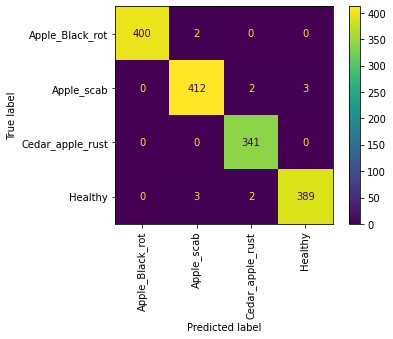

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions( y_true, y_pred, display_labels=target_names,xticks_rotation="vertical")

Text(0.5, 1.0, 'Confusion Matrix using Resnet50')

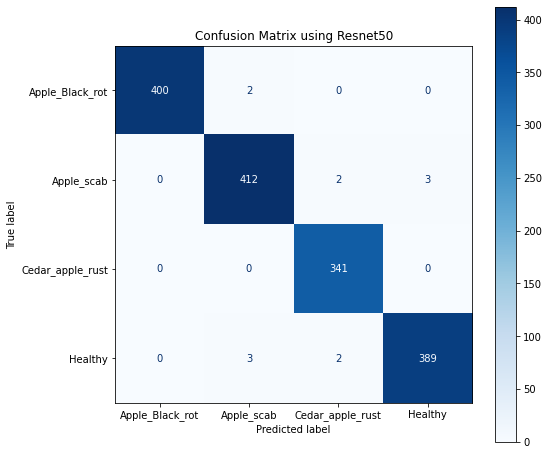

In [69]:
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(cmap=plt.cm.Blues,ax = ax)
plt.title("Confusion Matrix using Resnet50")

In [70]:
data_test = "/content/drive/MyDrive/Research/Dataset/Apple Leaf Valid Enhanced"

data_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_test,
  validation_split=0.9,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1000)

Found 2440 files belonging to 4 classes.
Using 2196 files for validation.


In [71]:
class_names_test = data_test_ds.class_names
print(class_names_test)

['Apple_Black_rot', 'Apple_scab', 'Cedar_apple_rust', 'Healthy']


In [72]:
for images, labels in data_test_ds.take(1):
  numpy_images_test = images.numpy()
  numpy_labels_test = labels.numpy()


from sklearn.metrics import classification_report

y_pred_2D_test = resnet_model.predict(numpy_images_test)
y_true_test = numpy_labels_test


y_pred_test = []
for preds in y_pred_2D_test:
  preds = preds.tolist()
  max_pred = max(preds)
  index = preds.index(max_pred)
  y_pred_test.append(index)

In [ ]:
print(numpy_labels_test)
print(y_pred_test)
print(len(y_pred_test))

In [74]:
target_names = data_test_ds.class_names
print(classification_report(y_true_test, y_pred_test, target_names=target_names))

                  precision    recall  f1-score   support

 Apple_Black_rot       0.99      0.99      0.99       391
      Apple_scab       1.00      0.97      0.99       209
Cedar_apple_rust       0.98      1.00      0.99       184
         Healthy       0.98      1.00      0.99       216

        accuracy                           0.99      1000
       macro avg       0.99      0.99      0.99      1000
    weighted avg       0.99      0.99      0.99      1000



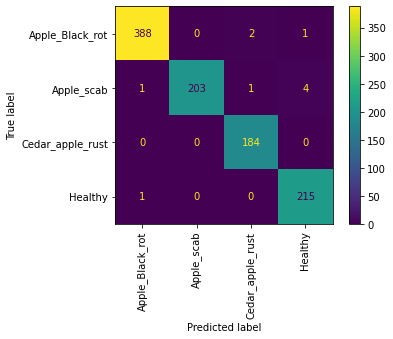

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
disp2 = ConfusionMatrixDisplay.from_predictions( y_true_test, y_pred_test, display_labels=target_names,xticks_rotation="vertical")

Text(0.5, 1.0, 'Confusion Matrix using Resnet50')

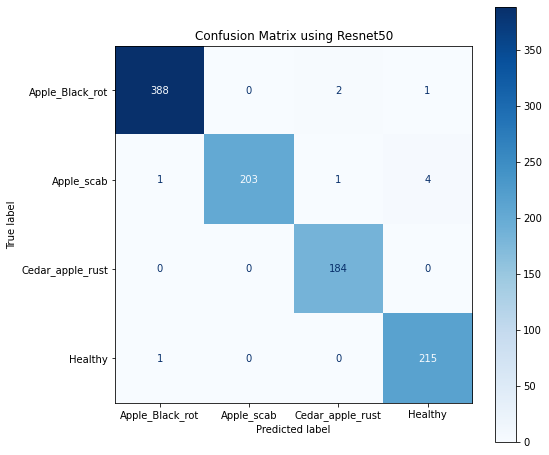

In [76]:
fig, ax = plt.subplots(figsize=(8,8))
disp2.plot(cmap=plt.cm.Blues,ax = ax)
plt.title("Confusion Matrix using Resnet50")

tpr: [0.0, 0.9923273657289002, 1.0]
fpr: [0.0, 0.003284072249589491, 1.0]
tpr: [0.0, 0.9712918660287081, 1.0]
fpr: [0.0, 0.0, 1.0]
tpr: [0.0, 1.0, 1.0]
fpr: [0.0, 0.003676470588235294, 1.0]
tpr: [0.0, 0.9953703703703703, 1.0]
fpr: [0.0, 0.006377551020408163, 1.0]
ROC AUC score: 0.9932064385337182


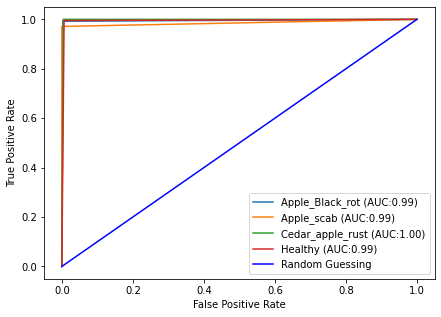

In [78]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

fig, c_ax = plt.subplots(1,1, figsize = (7, 5))
target= [ 'Apple_Black_rot', 'Apple_scab', 'Cedar_apple_rust', 'Healthy']
# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
        print('tpr:',list(tpr))
        print('fpr:',list(fpr))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_true_test, y_pred_test))
    
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()